### Student Information
Name:黃梓寧

Student ID:109061648

GitHub ID:duncan1315

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

### Begin Assignment Here



In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

X.query('category == "1"') #method1

X.head() #method2, default=5








### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

A is np.nan equal to missing value  
B E None is NonType  
C,D,F is  simply string, that's why .isnull() didn't work








### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

input:  
X_sample[::10][0:10]  
  
  output:  
	text	category	category_name  
	1032	From: mathew <mathew@mantis.co.uk> Subject: Re...	0	alt.atheism  
	870	From: ccgwt@trentu.ca (Grant Totten) Subject: ...	1	comp.graphics  
	12	From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...	0	alt.atheism  
	1892	From: oehler@picard.cs.wisc.edu (Eric Oehler) ...	1	comp.graphics  
	272	From: rayssd!esther@uunet.uu.net (Esther A. Pa...	3	soc.religion.christian  
	1102	From: andrew@calvin.dgbt.doc.ca (Andrew Patric...	2	sci.med  
	1971	From: rob@rjck.UUCP (Robert J.C. Kyanko) Subje...	1	comp.graphics  
	2050	From: keith@cco.caltech.edu (Keith Allan Schne...	0	alt.atheism  
	303	From: bolson@carson.u.washington.edu (Edward B...	1	comp.graphics  
	1078	From: young@serum.kodak.com (Rich Young) Subje...	2	sci.med  
	  
	  Dataframe is ordered randomly.  
	  It will sample the same file no matter how many time you try because random state is same
	  









### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

### >>> ** homework part 2:**  
#New dataset code begin here#


In [4]:
import jupyter
import numpy as np
import pandas as pd
import matplotlib as plt
import plotly 
import nltk
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

%matplotlib inline

In [5]:
import helpers.data_mining_helpers as dmh


In [6]:
df1 = pd.read_csv(
    'amazon_cells_labelled.txt',  sep='\t',header=None)
df2 = pd.read_csv(
    'imdb_labelled.txt',  sep='\t',header=None)
df3 = pd.read_csv(
    'yelp_labelled.txt',  sep='\t',header=None)

df = pd.concat([df1,df2,df3],axis=0,ignore_index = True)
df.columns = ['text', 'score']

print(len(df1),'\n')
print(len(df2),'\n')
print(len(df3),'\n')
print(df)

1000 

748 

1000 

                                                   text  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

[2748 rows x 2 columns]


In [7]:
print(df.iloc[:5])
print('\n\n',df.iloc[2747]) #check last one
print('\n\n',df.loc[2747,'text'])


                                                text  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


 text     Then, as if I hadn't wasted enough of my life ...
score                                                    0
Name: 2747, dtype: object


 Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.


In [8]:
print(sum(df1.duplicated()),'\n')
print(sum(df2.duplicated()),'\n')
print(sum(df3.duplicated()),'\n')
print(sum(df.duplicated()))

10 

3 

4 

17


In [9]:
df[df.duplicated()]

,text,score
285,Great phone!.,1
407,Works great.,1
524,Works great!.,1
543,Don't buy this product.,0
744,If you like a loud buzzing to override all you...,0
748,Does not fit.,0
778,This is a great deal.,1
792,Great Phone.,1
892,Excellent product for the price.,1
896,Great phone.,1


In [10]:
df=df.drop(index=[524,792,896]) #I only delete text which is almost the same

'''
df.drop_duplicates(keep='first', inplace=True)
'''
print(sum(df.duplicated()),'\n')
print(len(df),'\n')

14 

2745 



In [11]:
print(df[df.duplicated()],'\n\n') #I want to check how is the dupicated text looks like.
print(df.duplicated())

                                                   text  score
285                                       Great phone!.      1
407                                        Works great.      1
543                             Don't buy this product.      0
744   If you like a loud buzzing to override all you...      0
748                                       Does not fit.      0
778                               This is a great deal.      1
892                    Excellent product for the price.      1
1165                   Definitely worth checking out.        1
1387                                 Not recommended.        0
1590                                            10/10        1
2562                                 I love this place.      1
2564                             The food was terrible.      0
2591                                   I won't be back.      0
2594                  I would not recommend this place.      0 


0       False
1       False
2       False
3       Fa

In [12]:
sample = df.sample(n=1000)
print(len(sample),'\n')
print(sample[0:4],'\n\n')
print(sample.iloc[999],'\n')



1000 

                                                   text  score
356   The only thing that I think could improve is t...      0
783                                   It was horrible!.      0
2511                    But the service was beyond bad.      0
1203  For people who are first timers in film making...      1 


text     I used to talk on it for 1 - 1 1/2 hours and t...
score                                                    0
Name: 438, dtype: object 



1    1383
0    1362
Name: score, dtype: int64


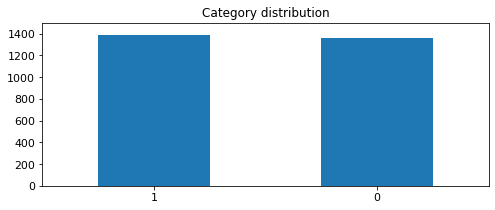

In [13]:
print(df.score.value_counts())

df.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

0    511
1    489
Name: score, dtype: int64


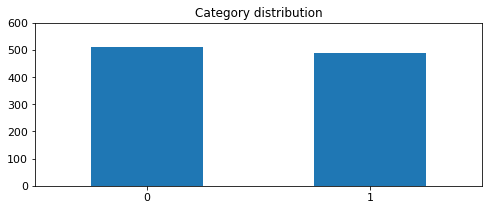

In [14]:
print(sample.score.value_counts())

sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [15]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [16]:
df[0:4]

,text,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [17]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [18]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

df_counts.shape

(2745, 5155)

In [19]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [20]:
df[0:5]

,text,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [21]:

feature_name = count_vect.get_feature_names()

print (feature_name,'\n\n')
print (df_counts,'\n\n')
print( df_counts[0:5, 0:100].toarray(),'\n\n')

, 'preferably', 'prejudice', 'prelude', 'premise', 'premium', 'prepare', 'prepared', 'preparing', 'presence', 'presentation', 'presents', 'preservation', 'president', 'pretentious', 'pretext', 'prettier', 'pretty', 'prevents', 'previous', 'price', 'priced', 'prices', 'pricey', 'pricing', 'primal', 'primary', 'prime', 'print', 'privileged', 'probably', 'problem', 'problems', 'procedure', 'procedures', 'proceedings', 'process', 'proclaimed', 'produce', 'produced', 'producer', 'producers', 'product', 'production', 'products', 'professional', 'professionals', 'professor', 'profiterole', 'profound', 'program', 'progresses', 'promise', 'promised', 'promote', 'prompt', 'prompted', 'promptly', 'prone', 'propaganda', 'properly', 'pros', 'protected', 'protection', 'protective', 'protector', 'protects', 'proud', 'proudly', 'proven', 'provide', 'provided', 'provides', 'providing', 'provokes', 'provoking', 'ps', 'ps3', 'pseudo', 'psyched', 'psychological', 'psychotic', 'pub', 'public', 'publicly', 

In [22]:
feature_name[4531]  #Use this code to check what tern it is 

'the'

In [23]:
count_vect.transform(['zillion zombiez']).toarray() #make sure it work

array([[0, 0, 0, ..., 1, 0, 1]])

In [24]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020']

In [25]:
plot_y = ["text_"+ str(i) for i in list(X.index)[0:50]]
plot_y

['text_0',
 'text_1',
 'text_2',
 'text_3',
 'text_4',
 'text_5',
 'text_6',
 'text_7',
 'text_8',
 'text_9',
 'text_10',
 'text_11',
 'text_12',
 'text_13',
 'text_14',
 'text_15',
 'text_16',
 'text_17',
 'text_18',
 'text_19',
 'text_20',
 'text_21',
 'text_22',
 'text_23',
 'text_24',
 'text_25',
 'text_26',
 'text_27',
 'text_28',
 'text_29',
 'text_30',
 'text_31',
 'text_32',
 'text_33',
 'text_34',
 'text_35',
 'text_36',
 'text_37',
 'text_38',
 'text_39',
 'text_40',
 'text_41',
 'text_42',
 'text_43',
 'text_44',
 'text_45',
 'text_46',
 'text_47',
 'text_48',
 'text_49']

In [26]:
plot_z = df_counts[0:50, 0:50].toarray()
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

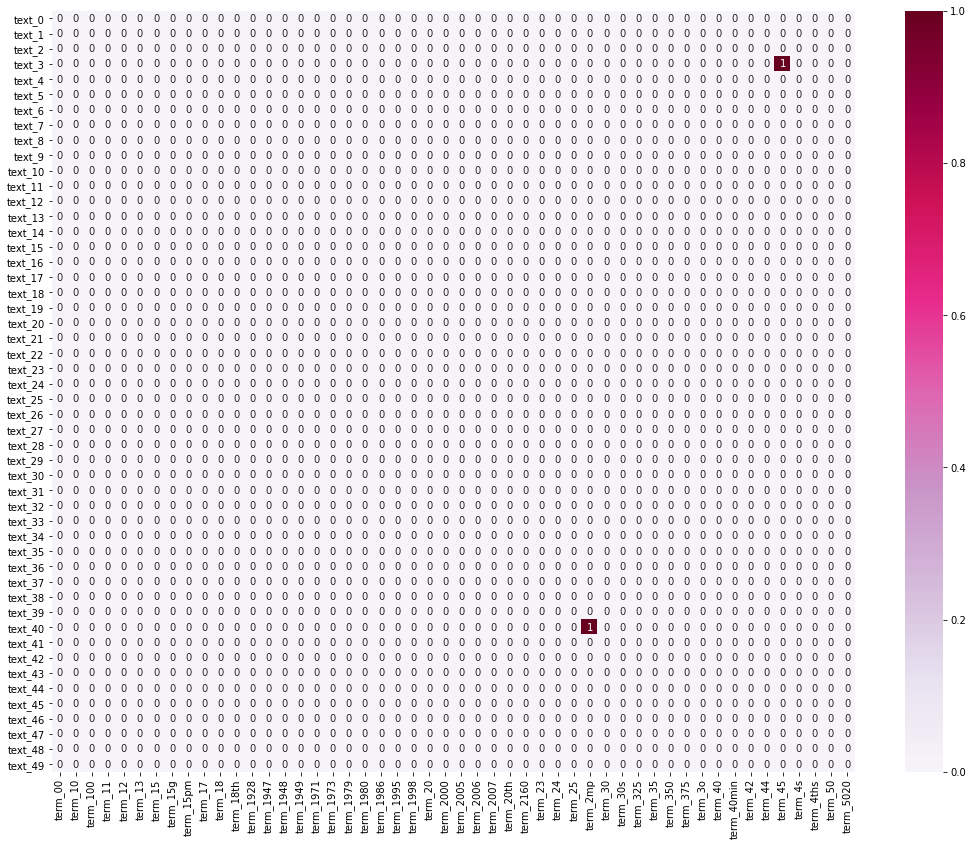

In [27]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [28]:
print(df_counts,'\n')
print(df_counts.shape,'\n')
print(type(df_counts))

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1
  (1, 1993)	1
  (1, 713)	1
  (1, 1603)	1
  (1, 4861)	1
  (2, 1829)	1
  (2, 4531)	1
  (2, 2023)	1
  :	:
  (2744, 4545)	1
  (2744, 4609)	1
  (2744, 2432)	1
  (2744, 2314)	1
  (2744, 4531)	3
  (2744, 647)	1
  (2744, 2282)	1
  (2744, 4542)	1
  (2744, 3097)	1
  (2744, 4974)	1
  (2744, 2982)	1
  (2744, 4593)	1
  (2744, 297)	1
  (2744, 3166)	1
  (2744, 2630)	1
  (2744, 1540)	1
  (2744, 4548)	1
  (2744, 785)	1
  (2744, 4630)	1
  (2744, 588)	1
  (2744, 2068)	1
  (2744, 3857)	1
  (2744, 3437)	1
  (2744, 5110)	1
  (2744, 1387)	1 

(2745, 5155) 

<class 'scipy.sparse.csr.csr_matrix'>


In [29]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)
print('\n',df_reduced)

(2745, 2)

 [[ 0.73222357  1.10324073]
 [-1.01920371  0.02567589]
 [-0.2799505  -0.01336774]
 ...
 [-0.50644378 -0.57673262]
 [ 0.31791811 -0.76017608]
 [ 2.17829145  0.34198116]]


In [31]:
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

xs = df_reduced[X].T[0]
ys = df_reduced[X].T[1]

ax.scatter(xs, ys,  marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices